In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ca = xr.open_dataset('Africa_cru_data.nc')
ca

<xarray.Dataset> Size: 378MB
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 126MB ...
    stn      (time, lat, lon) float64 252MB ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [3]:
gh=ca.pre
gh

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)> Size: 126MB
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 600B -19.75 -19.25 -18.75 ... 53.75 54.25 54.75
  * lat      (lat) float32 584B -34.75 -34.25 -33.75 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [4]:
ght = gh.sel(time=slice('1998-1','2008-12'),lon=slice(-3.5,1.5),lat=slice(4.5,11.5))
ght

<xarray.DataArray 'pre' (time: 132, lat: 14, lon: 10)> Size: 74kB
[18480 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1kB 1998-01-16 1998-02-15 ... 2008-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [5]:
salma=ght.groupby('time.month').sum('time')
salma

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[0.00000000e+00, 3.60799988e+02, 3.77100006e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.28299988e+02, 3.32500000e+02, 3.19399994e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.57300018e+02, 2.60099976e+02, 2.59799988e+02, ...,
         1.94900009e+02, 3.11500031e+02, 0.00000000e+00],
        ...,
        [2.76999989e+01, 8.80000019e+00, 1.81000023e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.56999998e+01, 7.90000010e+00, 8.40000057e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [7.20000029e+00, 7.00000000e+00, 6.60000038e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 5.59600037e+02, 5.60800049e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.17599976e+02, 6.49000000e+02, 6.14100037e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.51599976e+02, 6.64000000e+02, 6.43000000e+02, ...,
         2.65100006e+02, 4.29500031e+02, 0.00000000e+00],
...
         9.26000061e+01, 8.24000092e+01, 7.53999939e+01],
        [1.09099998e+02, 8.67999954e+01, 9.15999985e+01, ...,
         5.72000008e+01, 5.38999977e+01, 4.87000046e+01],
        [8.21000061e+01, 6.95999985e+01, 6.51999969e+01, ...,
         4.57000008e+01, 4.35999985e+01, 2.71000023e+01]],

       [[0.00000000e+00, 5.62400024e+02, 5.46300049e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.90200012e+02, 4.65800018e+02, 4.26200012e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.75200012e+02, 3.62500000e+02, 3.50400024e+02, ...,
         1.80400009e+02, 2.28000000e+02, 0.00000000e+00],
        ...,
        [2.11000023e+01, 2.33000011e+01, 1.78000011e+01, ...,
         1.52000008e+01, 1.55000000e+01, 9.30000019e+00],
        [1.16000004e+01, 1.02000008e+01, 1.00000029e+01, ...,
         7.90000010e+00, 7.19999981e+00, 2.50000000e+00],
        [7.70000029e+00, 7.00000048e+00, 8.50000000e+00, ...,
         2.40000010e+00, 2.80000019e+00, 2.09999990e+00]]],
      shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [6]:
clemz=salma.groupby('month').mean('month')
clemz

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[0.00000000e+00, 3.60799988e+02, 3.77100006e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.28299988e+02, 3.32500000e+02, 3.19399994e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.57300018e+02, 2.60099976e+02, 2.59799988e+02, ...,
         1.94900009e+02, 3.11500031e+02, 0.00000000e+00],
        ...,
        [2.76999989e+01, 8.80000019e+00, 1.81000023e+01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.56999998e+01, 7.90000010e+00, 8.40000057e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [7.20000029e+00, 7.00000000e+00, 6.60000038e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 5.59600037e+02, 5.60800049e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.17599976e+02, 6.49000000e+02, 6.14100037e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.51599976e+02, 6.64000000e+02, 6.43000000e+02, ...,
         2.65100006e+02, 4.29500031e+02, 0.00000000e+00],
...
         9.26000061e+01, 8.24000092e+01, 7.53999939e+01],
        [1.09099998e+02, 8.67999954e+01, 9.15999985e+01, ...,
         5.72000008e+01, 5.38999977e+01, 4.87000046e+01],
        [8.21000061e+01, 6.95999985e+01, 6.51999969e+01, ...,
         4.57000008e+01, 4.35999985e+01, 2.71000023e+01]],

       [[0.00000000e+00, 5.62400024e+02, 5.46300049e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.90200012e+02, 4.65800018e+02, 4.26200012e+02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.75200012e+02, 3.62500000e+02, 3.50400024e+02, ...,
         1.80400009e+02, 2.28000000e+02, 0.00000000e+00],
        ...,
        [2.11000023e+01, 2.33000011e+01, 1.78000011e+01, ...,
         1.52000008e+01, 1.55000000e+01, 9.30000019e+00],
        [1.16000004e+01, 1.02000008e+01, 1.00000029e+01, ...,
         7.90000010e+00, 7.19999981e+00, 2.50000000e+00],
        [7.70000029e+00, 7.00000048e+00, 8.50000000e+00, ...,
         2.40000010e+00, 2.80000019e+00, 2.09999990e+00]]],
      shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [8]:
Ghana=clemz.groupby('month').where(clemz>250)
Ghana

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[       nan,  360.8    ,  377.1    , ...,        nan,
                nan,        nan],
        [ 328.3    ,  332.5    ,  319.4    , ...,        nan,
                nan,        nan],
        [ 257.30002,  260.09998,  259.8    , ...,        nan,
          311.50003,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,  559.60004,  560.80005, ...,        nan,
                nan,        nan],
        [ 617.6    ,  649.     ,  614.10004, ...,        nan,
                nan,        nan],
        [ 651.6    ,  664.     ,  643.     , ...,  265.1    ,
          429.50003,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,  562.4    ,  546.30005, ...,        nan,
                nan,        nan],
        [ 490.2    ,  465.80002,  426.2    , ...,        nan,
                nan,        nan],
        [ 375.2    ,  362.5    ,  350.40002, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [10]:
data = Ghana.fillna(0)
data

<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)> Size: 7kB
array([[[   0.     ,  360.8    ,  377.1    , ...,    0.     ,
            0.     ,    0.     ],
        [ 328.3    ,  332.5    ,  319.4    , ...,    0.     ,
            0.     ,    0.     ],
        [ 257.30002,  260.09998,  259.8    , ...,    0.     ,
          311.50003,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,  559.60004,  560.80005, ...,    0.     ,
            0.     ,    0.     ],
        [ 617.6    ,  649.     ,  614.10004, ...,    0.     ,
            0.     ,    0.     ],
        [ 651.6    ,  664.     ,  643.     , ...,  265.1    ,
          429.50003,    0.     ],
...
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]],

       [[   0.     ,  562.4    ,  546.30005, ...,    0.     ,
            0.     ,    0.     ],
        [ 490.2    ,  465.80002,  426.2    , ...,    0.     ,
            0.     ,    0.     ],
        [ 375.2    ,  362.5    ,  350.40002, ...,    0.     ,
            0.     ,    0.     ],
        ...,
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ],
        [   0.     ,    0.     ,    0.     , ...,    0.     ,
            0.     ,    0.     ]]], shape=(12, 14, 10), dtype=float32)
Coordinates:
  * lon      (lon) float32 40B -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 56B 4.75 5.25 5.75 6.25 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

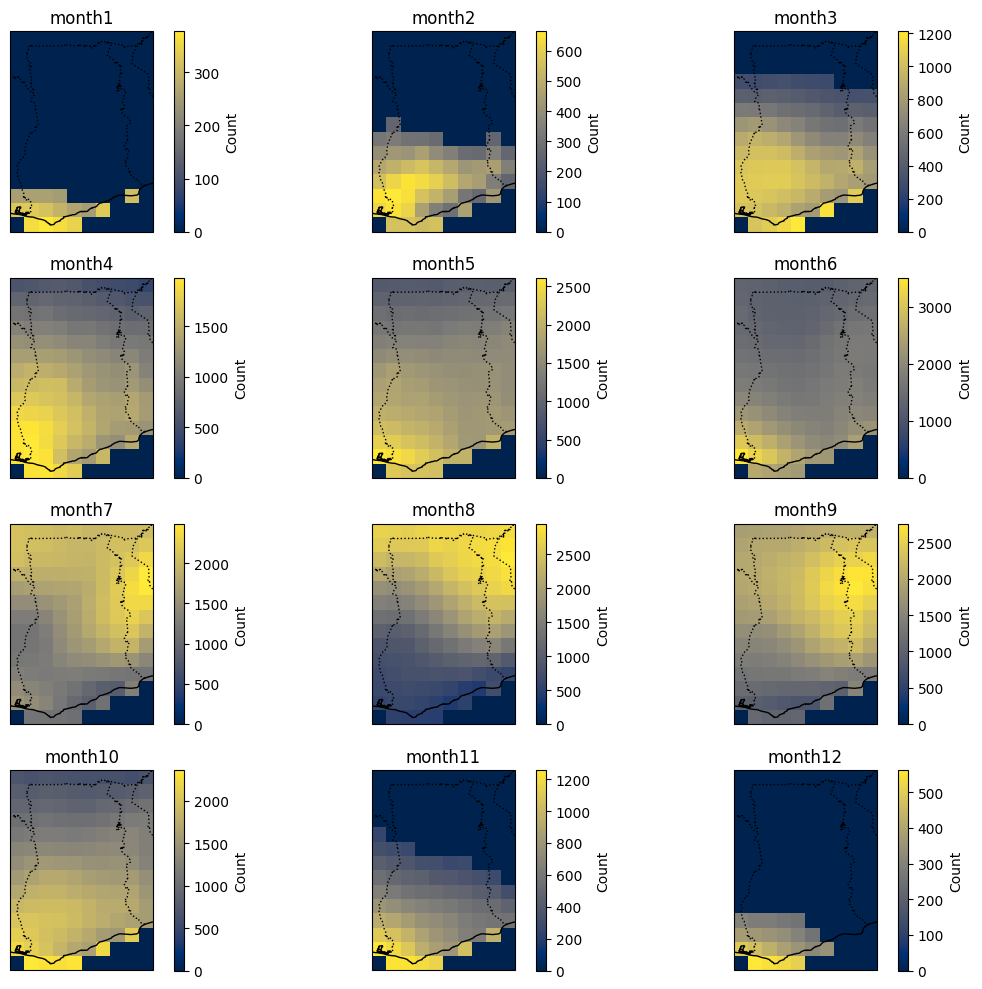

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10),subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

for i in range(12):
    month_data = data.isel(month=i)
    month_data.plot(ax=axes[i],transform=ccrs.PlateCarree(),  cmap='cividis',cbar_kwargs={'label': 'Count'})
    
    axes[i].set_title(f'month{i +1 }')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')

    
    
    axes[i].coastlines()
    axes[i].add_feature(cfeature.BORDERS, linestyle=':')
    axes[i].add_feature(cfeature.LAND, edgecolor='black',alpha=0.3)
    axes[i].add_feature(cfeature.OCEAN, alpha=0.1)

plt.tight_layout()
plt.show()